In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path='/content/drive/My Drive/data'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Modules for model creation
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), strides=(4,4), activation='relu',  input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),    
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(96, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [5]:
os.chdir("/content/drive/My Drive/data")
!ls

train  validation


In [6]:
# Label generator
TRAINING_DIR = os.path.join(path,'train')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    target_size=(200, 200))

VALIDATION_DIR = os.path.join(path,'validation')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                              class_mode='categorical',
                                                              target_size=(200, 200))

Found 4894 images belonging to 96 classes.
Found 4899 images belonging to 96 classes.


In [7]:
# Fit the model
history = model.fit(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/20
98/98 [==============================] - 6889s 70s/step - loss: 3.8875 - accuracy: 0.1310 - val_loss: 4.2966 - val_accuracy: 0.1261
Epoch 2/20
98/98 [==============================] - 65s 660ms/step - loss: 3.4506 - accuracy: 0.1720 - val_loss: 4.3408 - val_accuracy: 0.1119
Epoch 3/20
98/98 [==============================] - 65s 661ms/step - loss: 3.2124 - accuracy: 0.1890 - val_loss: 3.9512 - val_accuracy: 0.1386
Epoch 4/20
98/98 [==============================] - 65s 661ms/step - loss: 2.9806 - accuracy: 0.2342 - val_loss: 3.5692 - val_accuracy: 0.1529
Epoch 5/20
98/98 [==============================] - 65s 659ms/step - loss: 2.7140 - accuracy: 0.2742 - val_loss: 3.3847 - val_accuracy: 0.1574
Epoch 6/20
98/98 [==============================] - 65s 667ms/step - loss: 2.3886 - accuracy: 0.3539 - val_loss: 3.3969 - val_accuracy: 0.1533
Epoch 7/20
98/98 [==============================] - 65s 662ms/step - loss: 2.0116 - accuracy: 0.4383 - val_loss: 3.7065 - val_accuracy: 0.1535

<Figure size 432x288 with 0 Axes>

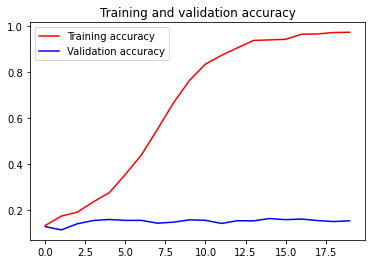

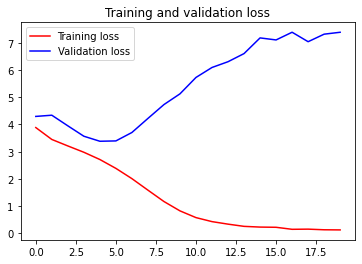

<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [12]:
!pip install pillow

7.0.0


Saving adrian.png to adrian (4).png


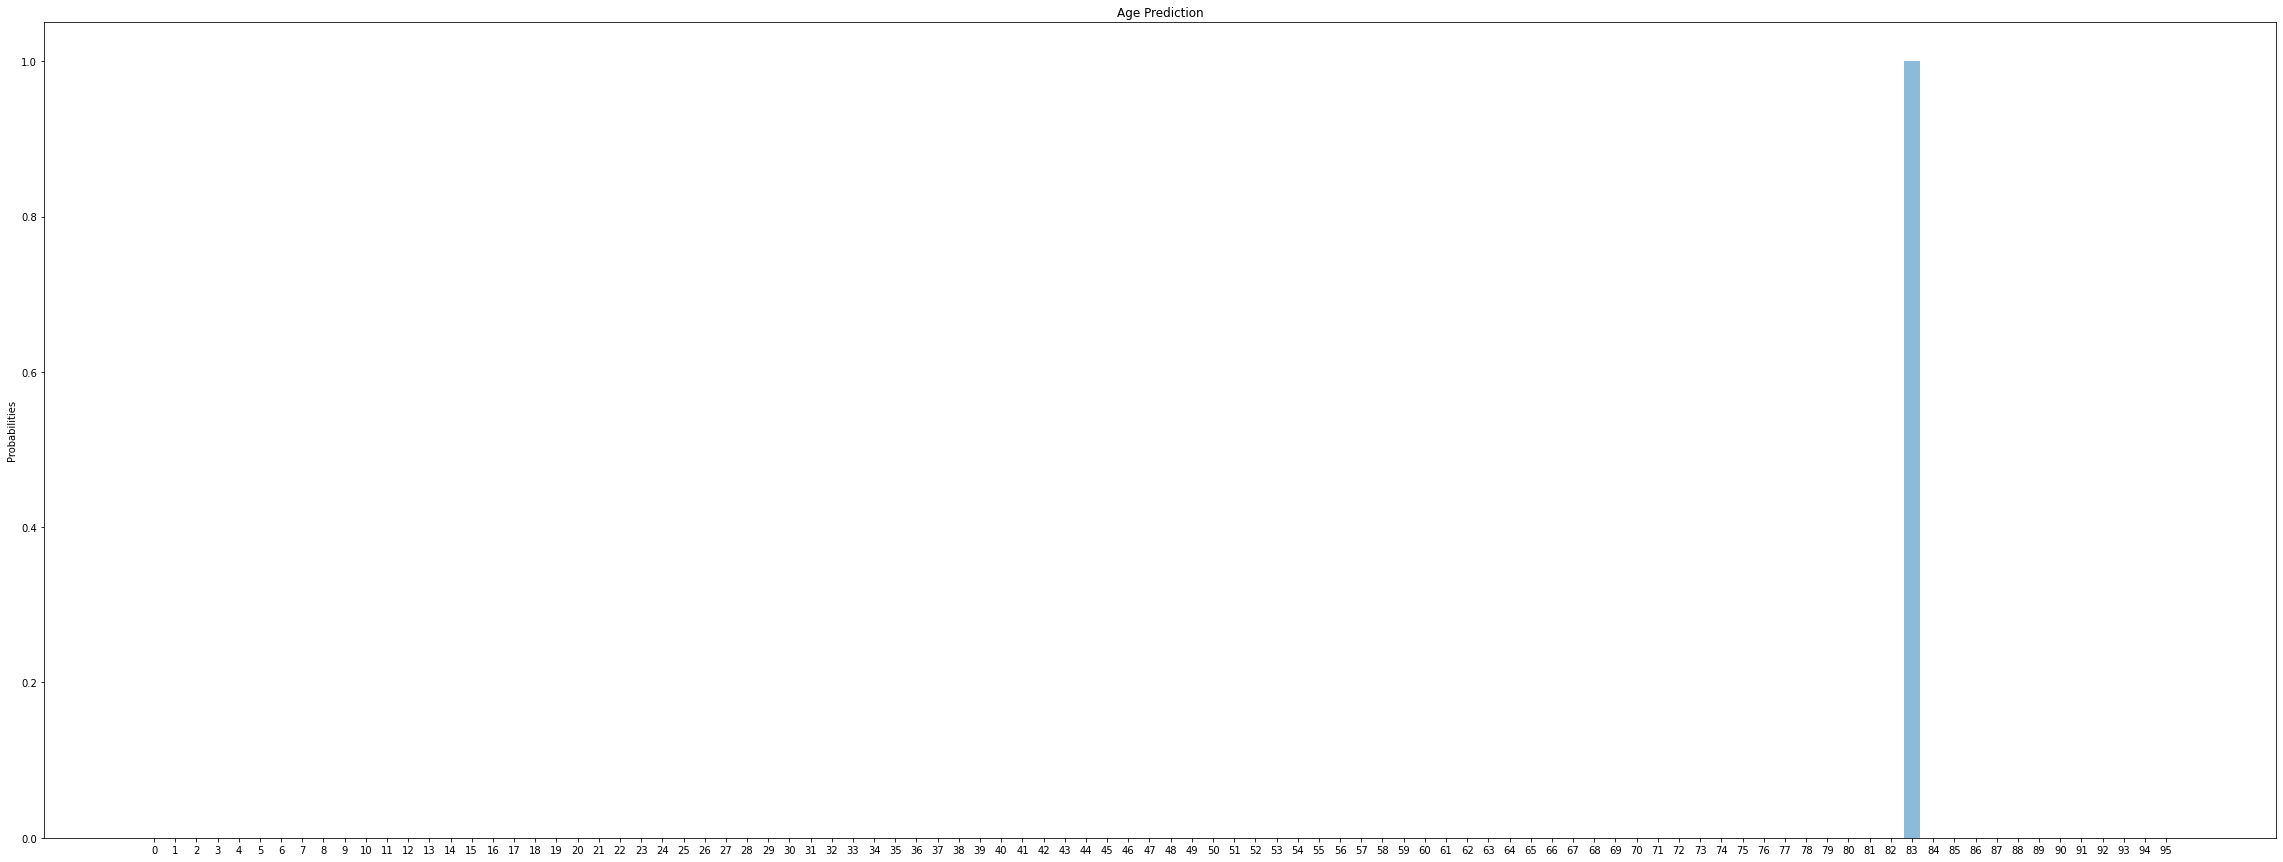

In [21]:
import numpy as np
import PIL
from google.colab import files
from keras.preprocessing import image

print(PIL.__version__ )


os.chdir("/content")

uploaded=files.upload()

age_group = []
for a in range(0,96):
  age_group.append(a)

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(200, 200))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  # print(classes)
  age_prediction = classes[0]
  
  y_pos = np.arange(len(age_group))

  plt.figure(figsize=(40, 15))
  plt.bar(y_pos, age_prediction, align='center', alpha=0.5)
  plt.xticks(y_pos, age_group)
  plt.ylabel('Probabilities')
  plt.title('Age Prediction')

  plt.show()
  


In [9]:
# save to our google drive mounted drive instead
os.chdir("/content/drive/My Drive/data")
model.save('my_model.h5') 

In [27]:
import tensorflow as tf

os.chdir("/content/drive/My Drive/data")
converter = tf.lite.TFLiteConverter.from_keras_model(model) # Your model's name
model = converter.convert()
file = open( 'my_model.tflite' , 'wb' ) 
file.write( model )

2394032